In [1]:
import sys
sys.path.insert(0, "../")

import h5py
from src.data.data_functions.hdf5_utils import unpack_hdf5

In [2]:
before = '../data/raw/AutoPi_CAN/platoon_CPH1_HH.hdf5'
after = "../data/interim/gm/converted_platoon_CPH1_HH.hdf5"
autopi_before = unpack_hdf5(before)
autopi_after = unpack_hdf5(after)

In [5]:
data_before = autopi_before['GM']['16006']['pass_1']['acc.xyz'][:, 3]
data_after = autopi_after['GM']['16006']['pass_1']['acc.xyz'][:, 3]

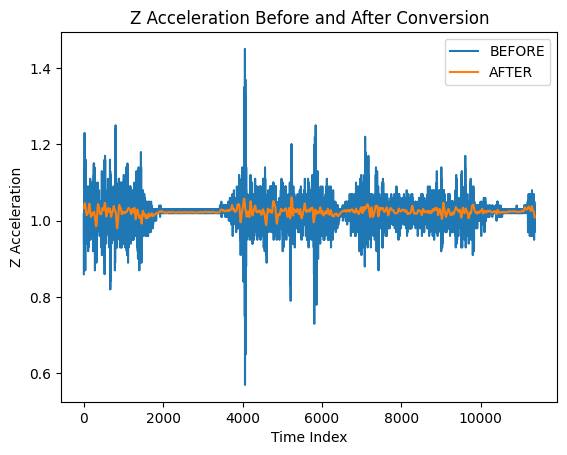

In [6]:
import matplotlib.pyplot as plt

x = range(len(data_before))
fig, ax = plt.subplots()
ax.plot(x, data_before, label='BEFORE')
ax.plot(x, data_after, label='AFTER')
ax.set_xlabel("Time Index")
ax.set_ylabel("Z Acceleration")
ax.legend()
ax.set_title(f"Z Acceleration Before and After Conversion")
plt.show()  